Source: https://www.practicaldatascience.org/html/exercises/Exercise_merging.html

# Pre-Legalization Analysis
__(1) We will begin by examining county-level data on arrests from California in 2009, which is derived from data provided by the Office of the California State Attorney General here. Download and import the file ca_arrests_2009.csv from the first link above (the second one is just to show you where it came from).__

In [6]:
!curl -LJO https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/ca/ca_arrests_2009.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3192  100  3192    0     0   9643      0 --:--:-- --:--:-- --:--:--  9672


In [7]:
!ls

Cleaning_Data.ipynb          Missing_Data.ipynb
DataFrames.ipynb             Series.ipynb
Data_Merging.ipynb           US_ACS_2017_10pct_sample.dta
Index.ipynb                  ca_arrests_2009.csv


__(2) Use your data exploration skills to get a feel for this data. If you need to, you can find the original codebook here (This data is similar, but has been collapsed to one observation per county.)__

In [8]:
import pandas as pd
import numpy as np
df = pd.read_csv('ca_arrests_2009.csv')

In [13]:
df.shape

(58, 10)

In [9]:
df.head()

,Unnamed: 0,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
0,1682,Alameda County,4318,4640,5749,260,3502,18469,37247,431
1,1683,Alpine County,8,4,2,1,1,16,83,0
2,1684,Amador County,100,59,101,5,199,464,801,2
3,1685,Butte County,641,602,542,34,429,2248,9026,1
4,1686,Calaveras County,211,83,123,14,70,501,968,3


In [10]:
df.describe()

,Unnamed: 0,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,1710.500000,2133.827586,2187.775862,2046.275862,142.913793,1531.293103,8042.086207,16727.948276,520.517241
std,16.886879,4937.729079,4949.115636,4591.867960,303.184460,3270.993593,17992.225337,34113.762098,1562.044019
min,1682.000000,8.000000,4.000000,2.000000,1.000000,1.000000,16.000000,83.000000,0.000000
25%,1696.250000,194.000000,141.250000,135.500000,14.000000,146.500000,637.250000,1541.500000,10.500000
50%,1710.500000,536.500000,518.500000,532.000000,39.000000,474.000000,2084.500000,6267.000000,73.000000
75%,1724.750000,2204.000000,2338.750000,1860.500000,117.750000,1993.500000,8677.500000,16417.250000,386.000000
max,1739.000000,35319.000000,34630.000000,32193.000000,2041.000000,23524.000000,127707.000000,238608.000000,11049.000000


In [12]:
df.isna().sum()

Unnamed: 0    0
COUNTY        0
VIOLENT       0
PROPERTY      0
F_DRUGOFF     0
F_SEXOFF      0
F_ALLOTHER    0
F_TOTAL       0
M_TOTAL       0
S_TOTAL       0
dtype: int64

__(3) Figuring out what county has the most violent arrests isn’t very meaningful if we don’t normalize for size. A county with 10 people and 10 arrests for violent crimes is obviously worse than a county with 1,000,000 people an 11 arrests for violent crime.__

To address this, also import nhgis_county_populations.csv from the directory we’re working from.

In [14]:
!curl -LJO https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/ca/nhgis_county_populations.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  288k  100  288k    0     0   449k      0 --:--:-- --:--:-- --:--:--  448k


In [15]:
population_df = pd.read_csv('nhgis_county_populations.csv')

__(4) Use your data exploration skills to get used to this data, and figure out how it relates to your 2009 arrest data.__

In [16]:
population_df.shape

(6441, 5)

In [17]:
population_df.head()

,Unnamed: 0,YEAR,STATE,COUNTY,total_population
0,0,2005-2009,Alabama,Autauga County,49584
1,1,2005-2009,Alabama,Baldwin County,171997
2,2,2005-2009,Alabama,Barbour County,29663
3,3,2005-2009,Alabama,Bibb County,21464
4,4,2005-2009,Alabama,Blount County,56804


In [21]:
cond1 = population_df['YEAR'] == '2005-2009'
cond2 = population_df['COUNTY'] == 'Alameda County'
population_df[cond1&cond2].sort_values('COUNTY').head(10)

,Unnamed: 0,YEAR,STATE,COUNTY,total_population
186,186,2005-2009,California,Alameda County,1457095


__(5) Once you feel like you have a good sense of the relation between our arrest and population data, merge the two datasets.__

In [22]:
cond1 = population_df['YEAR'] == '2005-2009'
grouped_population_df = population_df[cond1].groupby('COUNTY')['total_population'].sum().reset_index()

In [37]:
merged_df = pd.merge(df, grouped_population_df, on='COUNTY', how='left', validate='one_to_one')
merged_df.shape

(58, 11)

In [30]:
# Missing population data
cond = merged_df['total_population'].isna()
merged_df[cond]

,Unnamed: 0,COUNTY,VIOLENT,PROPERTY,F_DRUGOFF,F_SEXOFF,F_ALLOTHER,F_TOTAL,M_TOTAL,S_TOTAL,total_population
7,1689,Del Norte County,144,104,79,13,97,437,1268,5,NaN
13,1695,Inyo County,81,44,39,3,38,205,851,1,NaN


In [34]:
cond = merged_df['total_population'].isna()
merged_df = merged_df[~cond].copy()
merged_df.shape

(56, 11)

Skipping steps 6 to 9 as it is looking good already

# Comparing Arrest Rates

__(10) Now that we have arrest counts and population data, we can calculate arrest rates. For each county, create a new variable called violent_arrest_rate_2009 that is the number of violent arrests for 2009 divided by the population of the county from 2005-2009, and an analogous variable for drug offenses (F_DRUGOFF).__

In [38]:
merged_df['violent_arrest_rate_2009'] = merged_df['VIOLENT']/merged_df['total_population']
merged_df['drugoff_arrest_rate_2009'] = merged_df['F_DRUGOFF']/merged_df['total_population']

__(11) Make a scatter plot that shows the relationship between each county’s violent arrest rate and it’s drug arrest rate.__

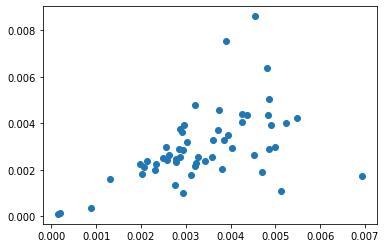

In [41]:
import matplotlib.pyplot as plt
plt.scatter(merged_df['violent_arrest_rate_2009'], merged_df['drugoff_arrest_rate_2009'])

# Comparing with 2018 Arrests

__(12) Just as we created violent arrest rates and drug arrest rates for 2009, now we want to do it for 2018. Using the data on 2018 arrests (also in the same repository we used before) and the same dataset of population data (you’ll have to use population from 2013-2017, as 2018 population data has yet to be released), create a dataset of arrest rates.__

In [42]:
!curl -LJO https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/ca/ca_arrests_2018.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3088  100  3088    0     0   7352      0 --:--:-- --:--:-- --:--:--  7352


In [43]:
df_2018 = pd.read_csv('ca_arrests_2018.csv')

In [50]:
cond1 = population_df['YEAR'] == '2013-2017'
grouped_population_df_2018 = population_df[cond1].groupby('COUNTY')['total_population'].sum().reset_index()
merged_2018_df = pd.merge(df_2018, grouped_population_df_2018, on='COUNTY', how='inner', validate='one_to_one')

In [51]:
merged_2018_df.shape

(56, 11)

In [52]:
merged_2018_df['violent_arrest_rate_2018'] = merged_2018_df['VIOLENT']/merged_2018_df['total_population']
merged_2018_df['drugoff_arrest_rate_2018'] = merged_2018_df['F_DRUGOFF']/merged_2018_df['total_population']

__(13) Now merge the two county-level datasets so you have one row for every county, and variables for violent arrest rates in 2018, violent arrest rates in 2009, felony drug arrest rates in 2018, and felony drug arrest rates in 2009.__

In [54]:
cols2009 = ['COUNTY','violent_arrest_rate_2009','drugoff_arrest_rate_2009']
cols2018 = ['COUNTY','violent_arrest_rate_2018','drugoff_arrest_rate_2018']
final_df = pd.merge(merged_df[cols2009], merged_2018_df[cols2018], on='COUNTY', how='inner', validate='one_to_one')

In [55]:
final_df.shape

(56, 5)

__(14) Did drug arrests go down from 2009 to 2018? (they sure better! This is what’s called a “sanity check” of your data and analysis. If you find drug arrests went up, you know something went wrong with your code or your understanding of the situations.__

In [69]:
((final_df['drugoff_arrest_rate_2018'] / final_df['drugoff_arrest_rate_2009']) - 1).mean()

-0.6684925425663503

It went down by 66%

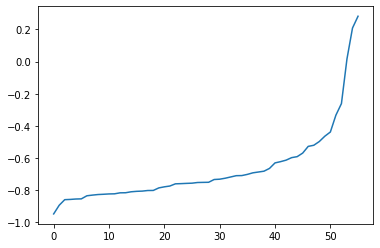

In [75]:
plt.plot(((final_df['drugoff_arrest_rate_2018'] / final_df['drugoff_arrest_rate_2009']) - 1).sort_values().reset_index(drop=True))

It went down in most counties

__(15) Now we want to look at whether violent crime decreased following drug legalization. Did the average violent arrest rate decrease? By how much? (Note: We’re assuming that arrest rates are proportionate to crime rates. If policing increased so that there were more arrests per crime committed, that would impact our interpretation of these results. But this is just an exercise, so…)__

-0.07854839850887395

It went down just 7.8%

__(16) let’s do a kind of difference-in-difference analysis__
__So let’s split our sample into two groups: high drug arrests in 2009, and low drug arrests in 2009 (cut the sample at the average drug arrest rate in 2009).
Now we can ask: did violent crime fall more from 2009 to 2018 in the counties that had lots of drug arrests in 2009 (where legalization likely had more of an effect) than in counties with fewer drug arrests in 2009 (where legalization likely mattered less)? Calculate this difference-in-differences:__

(the change in violent crime rate for counties with lots of drug arrests in 2009) - (the change in violent crime rate for counties with few drug arrests in 2009)

In [81]:
cond1 = final_df['drugoff_arrest_rate_2009'] > final_df['drugoff_arrest_rate_2009'].median()
group_high_drugoff = final_df[cond1].copy()
group_low_drugoff = final_df[~cond1].copy()

In [84]:
(group_high_drugoff['violent_arrest_rate_2018'].mean() - group_high_drugoff['violent_arrest_rate_2009'].mean()) - \
(group_low_drugoff['violent_arrest_rate_2018'].mean() - group_low_drugoff['violent_arrest_rate_2009'].mean())

-0.00025134754361280697

It seems to have decreased more in the counties with high drug offence

__(17) Hmmm… we showed that there was a greater absolute decline in violent arrest rates in counties more impacted by drug legalization. But was there also a greater proportionate decline?__

Calculate:

(the percentage change in violent crime rate for counties with lots of drug arrests in 2009) - (the percentage change in violent crime rate for counties with few drug arrests in 2009)

In [82]:
((group_high_drugoff['violent_arrest_rate_2018'] / group_high_drugoff['violent_arrest_rate_2009']) - 1).mean()

-0.11569101120069772

In [83]:
((group_low_drugoff['violent_arrest_rate_2018'] / group_low_drugoff['violent_arrest_rate_2009']) - 1).mean()

-0.041405785817050185